<a href="https://colab.research.google.com/github/balakrishnanvinchu/deep-reinforcement-learning/blob/main/MAB_Clinical_Trial_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `---------------Mandatory Information to fill------------`

### Group ID: 144
### Group Members Name with Student ID:
1. Student 1
2. Student 2
3. Student 3
4. Bhartendu Kumar - 2024aa05279@wilp.bits-pilani.ac.in


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##We did this assignment collaboratively, like discussing in meeting the theoritical part and the implementation !

# Scenario

A pharmaceutical company is conducting clinical trials to evaluate the effectiveness of three antiretroviral drug combinations for treating HIV-positive patients. Due to the ethical and cost constraints of clinical trials, it is critical to identify the most effective treatment regimen using the least number of patients. Each treatment (or “arm”) can lead to different outcomes depending on patient responses. The effectiveness of each treatment is evaluated using a reward function derived from the improvement in patients’ immune system markers and survival status.



# Problem Definition

You are provided with a clinical dataset where each record corresponds to a patient, including the treatment they received and the resulting health outcomes. Your task is to simulate a clinical trial environment using various MAB strategies to sequentially recommend treatments and observe outcomes. The objective is to maximize the overall success rate across trials by identifying and favouring the most effective treatment.



# Dataset

You will be provided a dataset containing the following fields:

* ***Age (age)***: Patient's age in years at baseline.
* ***Weight (wtkg)***: Continuous feature representing weight in kilograms at baseline.
* ***Gender (gender)***: Binary indicator of gender (0 = Female, 1 = Male).
* ***CD4 Counts (cd40, cd420)***: Integer values representing CD4 counts at baseline and 20+/-5 weeks.
* ***Treatment Indicator (trt)***: Categorical feature indicating the type of treatment received (0 = ZDV only, 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only).
* ***Censoring Indicator (label)***: Binary indicator (1 = failure, 0 = censoring) denoting patient status.


***Link for accessing dataset:***
https://drive.google.com/file/d/1LYfIrJ4VEEGeyOsSt_qoLk7FaAv5Jfx-/view?usp=sharing


# Environment Setup

***Arms (Actions):*** The treatment types (trt)
* Arm 0: ZDV only
* Arm 1: ZDV + ddI
* Arm 2: ZDV + Zal
* Arm 3: ddI only


**Reward Function:**

Reward `r` is defined as:

`r = 1, if (label == 0) and (cd420 > cd40)`

`r = 0, otherwise`


  
This reward represents a successful treatment outcome as an increase in CD4 count and survival.

**Assumptions:**

*Number of Iterations:* Run the simulation for at least 1000 trials (iterations), with the option to extend the number of trials depending on the convergence behavior or observed reward trends. In each iteration, simulate one patient trial using one of the bandit policies.


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [1]:
# Constants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


# Load Dataset (0.5M)

In [2]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------
# Load dataset
# Step 1: Load the clinical trial dataset from a public Google Drive link
url = "https://drive.google.com/uc?export=download&id=1LYfIrJ4VEEGeyOsSt_qoLk7FaAv5Jfx-"
data_csv = pd.read_csv(url)
print(data_csv.head())

# Calculate and add the 'reward' column before performing the groupby operation
data_csv['reward'] = data_csv.apply(lambda row: 1 if (row['label'] == 0 and row['cd420'] > row['cd40']) else 0, axis=1)

# Print average reward per arm for diagnostic insight
print(" Average reward per treatment arm:")
print(data_csv.groupby("trt")[["cd40", "cd420", "label", "reward"]].mean())

   age     wtkg  gender  cd40  cd420  trt  label
0   48  89.8128       0   422    477    2      0
1   61  49.4424       0   162    218    3      1
2   45  88.4520       1   326    274    3      0
3   47  85.2768       1   287    394    3      0
4   43  66.6792       1   504    353    0      0
 Average reward per treatment arm:
           cd40       cd420     label    reward
trt                                            
0    353.204887  336.139098  0.340226  0.328947
1    348.724138  403.172414  0.197318  0.565134
2    352.774809  372.038168  0.208015  0.458015
3    347.467023  374.324421  0.228164  0.481283


# Design a Clinical Trial Environment (0.5M)

In [3]:
# Code for environment setup along with reward function
#-----write your code below this line---------
class ClinicalTrialEnvironment:
    def __init__(self, data):
        self.data = data.copy()
        self.data['reward'] = self.data.apply(self.get_reward, axis=1)
        self.arms = sorted(self.data['trt'].unique())
        self.n_arms = len(self.arms)

    def get_reward(self, row):
        return 1 if (row['label'] == 0 and row['cd420'] > row['cd40']) else 0

    def pull_arm(self, arm):
        sample = self.data[self.data['trt'] == arm].sample(1)
        return sample['reward'].values[0]

    def get_arms(self):
        return self.arms
env = ClinicalTrialEnvironment(data_csv)
arms = env.get_arms()
n_arms = env.n_arms
print(f"Arms: {arms}")
print(f"Number of Arms: {n_arms}")


Arms: [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]
Number of Arms: 4


# Using Random Policy (0.5M)
Implement a random policy for treatment selection and print each iteration. (Mandatory)

In [4]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------
# Random Policy: Selects a treatment arm at random each iteration
def random_policy(env, iterations=1000):
    arms = env.get_arms()
    n_arms = env.n_arms
    rewards, arm_counts = [], np.zeros(n_arms)
    for i in range(iterations):
        arm = random.choice(arms)
        reward = env.pull_arm(arm)
        rewards.append(reward)
        arm_counts[arm] += 1
        print(f"[Random] Iter {i+1}: Arm={arm}, Reward={reward}")
    return rewards, arm_counts


# Random Policy Output
random_rewards, random_counts = random_policy(env)


[Random] Iter 1: Arm=0, Reward=0
[Random] Iter 2: Arm=3, Reward=1
[Random] Iter 3: Arm=3, Reward=1
[Random] Iter 4: Arm=0, Reward=0
[Random] Iter 5: Arm=0, Reward=1
[Random] Iter 6: Arm=1, Reward=1
[Random] Iter 7: Arm=1, Reward=0
[Random] Iter 8: Arm=3, Reward=0
[Random] Iter 9: Arm=3, Reward=0
[Random] Iter 10: Arm=1, Reward=1
[Random] Iter 11: Arm=3, Reward=0
[Random] Iter 12: Arm=0, Reward=0
[Random] Iter 13: Arm=1, Reward=1
[Random] Iter 14: Arm=3, Reward=1
[Random] Iter 15: Arm=0, Reward=1
[Random] Iter 16: Arm=3, Reward=0
[Random] Iter 17: Arm=0, Reward=0
[Random] Iter 18: Arm=3, Reward=1
[Random] Iter 19: Arm=1, Reward=0
[Random] Iter 20: Arm=3, Reward=1
[Random] Iter 21: Arm=3, Reward=0
[Random] Iter 22: Arm=0, Reward=0
[Random] Iter 23: Arm=2, Reward=0
[Random] Iter 24: Arm=3, Reward=1
[Random] Iter 25: Arm=0, Reward=1
[Random] Iter 26: Arm=2, Reward=1
[Random] Iter 27: Arm=2, Reward=1
[Random] Iter 28: Arm=2, Reward=1
[Random] Iter 29: Arm=1, Reward=0
[Random] Iter 30: Arm=3

# Using Greedy Policy (1M)
Implement the Greedy policy that always selects the treatment with the highest average reward and print each iteration. (Mandatory)

In [5]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
# Greedy Policy: Always picks the arm with highest current average reward
def greedy_policy(env, iterations=1000):
    arms = env.get_arms()
    n_arms = env.n_arms
    rewards, arm_counts = [], np.zeros(n_arms)
    avg_rewards = np.zeros(n_arms)
    for i in range(iterations):
        arm = arms[i] if i < n_arms else np.argmax(avg_rewards)
        reward = env.pull_arm(arm)
        rewards.append(reward)
        arm_counts[arm] += 1
        avg_rewards[arm] += (reward - avg_rewards[arm]) / arm_counts[arm]
        print(f"[Greedy] Iter {i+1}: Arm={arm}, Reward={reward}, Avg={avg_rewards}")
    return rewards, arm_counts


# Greedy Policy Output
greedy_rewards, greedy_counts = greedy_policy(env)

[Greedy] Iter 1: Arm=0, Reward=0, Avg=[0. 0. 0. 0.]
[Greedy] Iter 2: Arm=1, Reward=1, Avg=[0. 1. 0. 0.]
[Greedy] Iter 3: Arm=2, Reward=1, Avg=[0. 1. 1. 0.]
[Greedy] Iter 4: Arm=3, Reward=0, Avg=[0. 1. 1. 0.]
[Greedy] Iter 5: Arm=1, Reward=1, Avg=[0. 1. 1. 0.]
[Greedy] Iter 6: Arm=1, Reward=1, Avg=[0. 1. 1. 0.]
[Greedy] Iter 7: Arm=1, Reward=0, Avg=[0.   0.75 1.   0.  ]
[Greedy] Iter 8: Arm=2, Reward=0, Avg=[0.   0.75 0.5  0.  ]
[Greedy] Iter 9: Arm=1, Reward=1, Avg=[0.  0.8 0.5 0. ]
[Greedy] Iter 10: Arm=1, Reward=1, Avg=[0.         0.83333333 0.5        0.        ]
[Greedy] Iter 11: Arm=1, Reward=1, Avg=[0.         0.85714286 0.5        0.        ]
[Greedy] Iter 12: Arm=1, Reward=0, Avg=[0.   0.75 0.5  0.  ]
[Greedy] Iter 13: Arm=1, Reward=0, Avg=[0.         0.66666667 0.5        0.        ]
[Greedy] Iter 14: Arm=1, Reward=0, Avg=[0.  0.6 0.5 0. ]
[Greedy] Iter 15: Arm=1, Reward=1, Avg=[0.         0.63636364 0.5        0.        ]
[Greedy] Iter 16: Arm=1, Reward=1, Avg=[0.         0.6

# Using Epsilon-Greedy Policy (1.5M)
Implement the ε-Greedy policy with ε = 0.1, 0.2, 0.5. Report iteration-wise selections and rewards. Determine which ε yields the best result. (Mandatory)

In [6]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
# Epsilon-Greedy Policy: Explores with probability epsilon, otherwise exploits best-known arm
def epsilon_greedy_policy(env, epsilon=0.1, iterations=1000):
    arms = env.get_arms()
    n_arms = env.n_arms
    rewards, arm_counts = [], np.zeros(n_arms)
    avg_rewards = np.zeros(n_arms)
    for i in range(iterations):
        explore = random.random() < epsilon
        arm = random.choice(arms) if explore else np.argmax(avg_rewards)
        reward = env.pull_arm(arm)
        rewards.append(reward)
        arm_counts[arm] += 1
        avg_rewards[arm] += (reward - avg_rewards[arm]) / arm_counts[arm]
        print(f"[Eps={epsilon}] Iter {i+1}: Arm={arm}, Reward={reward}, Explore={explore}")
    return rewards, arm_counts
eps_01_rewards, eps_01_counts = epsilon_greedy_policy(env, 0.1)


[Eps=0.1] Iter 1: Arm=0, Reward=1, Explore=False
[Eps=0.1] Iter 2: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 3: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 4: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 5: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 6: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 7: Arm=0, Reward=1, Explore=False
[Eps=0.1] Iter 8: Arm=0, Reward=1, Explore=False
[Eps=0.1] Iter 9: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 10: Arm=0, Reward=1, Explore=False
[Eps=0.1] Iter 11: Arm=0, Reward=1, Explore=False
[Eps=0.1] Iter 12: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 13: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 14: Arm=0, Reward=0, Explore=False
[Eps=0.1] Iter 15: Arm=2, Reward=1, Explore=True
[Eps=0.1] Iter 16: Arm=2, Reward=1, Explore=False
[Eps=0.1] Iter 17: Arm=2, Reward=1, Explore=False
[Eps=0.1] Iter 18: Arm=0, Reward=0, Explore=True
[Eps=0.1] Iter 19: Arm=2, Reward=1, Explore=False
[Eps=0.1] Iter 20: Arm=2, Reward=0, Explore=False
[Eps=0.1] I

In [7]:
eps_02_rewards, eps_02_counts = epsilon_greedy_policy(env, 0.2)


[Eps=0.2] Iter 1: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 2: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 3: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 4: Arm=0, Reward=1, Explore=False
[Eps=0.2] Iter 5: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 6: Arm=0, Reward=1, Explore=False
[Eps=0.2] Iter 7: Arm=0, Reward=1, Explore=True
[Eps=0.2] Iter 8: Arm=0, Reward=1, Explore=False
[Eps=0.2] Iter 9: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 10: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 11: Arm=0, Reward=1, Explore=False
[Eps=0.2] Iter 12: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 13: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 14: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 15: Arm=0, Reward=0, Explore=False
[Eps=0.2] Iter 16: Arm=2, Reward=1, Explore=True
[Eps=0.2] Iter 17: Arm=2, Reward=0, Explore=False
[Eps=0.2] Iter 18: Arm=2, Reward=0, Explore=False
[Eps=0.2] Iter 19: Arm=1, Reward=1, Explore=True
[Eps=0.2] Iter 20: Arm=1, Reward=1, Explore=False
[Eps=0.2] It

In [8]:
eps_05_rewards, eps_05_counts = epsilon_greedy_policy(env, 0.5)

[Eps=0.5] Iter 1: Arm=1, Reward=0, Explore=True
[Eps=0.5] Iter 2: Arm=3, Reward=1, Explore=True
[Eps=0.5] Iter 3: Arm=2, Reward=1, Explore=True
[Eps=0.5] Iter 4: Arm=2, Reward=1, Explore=False
[Eps=0.5] Iter 5: Arm=2, Reward=0, Explore=True
[Eps=0.5] Iter 6: Arm=3, Reward=1, Explore=False
[Eps=0.5] Iter 7: Arm=2, Reward=0, Explore=True
[Eps=0.5] Iter 8: Arm=3, Reward=0, Explore=False
[Eps=0.5] Iter 9: Arm=0, Reward=0, Explore=True
[Eps=0.5] Iter 10: Arm=3, Reward=1, Explore=True
[Eps=0.5] Iter 11: Arm=3, Reward=1, Explore=True
[Eps=0.5] Iter 12: Arm=2, Reward=1, Explore=True
[Eps=0.5] Iter 13: Arm=3, Reward=1, Explore=False
[Eps=0.5] Iter 14: Arm=3, Reward=1, Explore=False
[Eps=0.5] Iter 15: Arm=2, Reward=1, Explore=True
[Eps=0.5] Iter 16: Arm=2, Reward=1, Explore=True
[Eps=0.5] Iter 17: Arm=3, Reward=1, Explore=False
[Eps=0.5] Iter 18: Arm=3, Reward=0, Explore=False
[Eps=0.5] Iter 19: Arm=3, Reward=0, Explore=True
[Eps=0.5] Iter 20: Arm=2, Reward=0, Explore=False
[Eps=0.5] Iter 21: Ar

# Using UCB (1M)
Implement the UCB algorithm for treatment selection and print each  iteration. (Mandatory)

In [9]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------

# UCB Policy: Uses Upper Confidence Bound to balance exploration and exploitation
def ucb_policy(env, iterations=1000):
    arms = env.get_arms()
    n_arms = env.n_arms
    rewards, arm_counts = [], np.zeros(n_arms)
    avg_rewards = np.zeros(n_arms)
    for i in range(iterations):
        ucb_values = [float('inf') if arm_counts[arm] == 0 else avg_rewards[arm] + np.sqrt(2 * np.log(i + 1) / arm_counts[arm]) for arm in arms]
        arm = np.argmax(ucb_values)
        reward = env.pull_arm(arm)
        rewards.append(reward)
        arm_counts[arm] += 1
        avg_rewards[arm] += (reward - avg_rewards[arm]) / arm_counts[arm]
        print(f"[UCB] Iter {i+1}: Arm={arm}, Reward={reward}, UCB={ucb_values}")
    return rewards, arm_counts

ucb_rewards, ucb_counts = ucb_policy(env)


[UCB] Iter 1: Arm=0, Reward=1, UCB=[inf, inf, inf, inf]
[UCB] Iter 2: Arm=1, Reward=1, UCB=[np.float64(2.177410022515475), inf, inf, inf]
[UCB] Iter 3: Arm=2, Reward=0, UCB=[np.float64(2.4823038073675114), np.float64(2.4823038073675114), inf, inf]
[UCB] Iter 4: Arm=3, Reward=1, UCB=[np.float64(2.6651092223153956), np.float64(2.6651092223153956), np.float64(1.6651092223153954), inf]
[UCB] Iter 5: Arm=0, Reward=0, UCB=[np.float64(2.7941225779941012), np.float64(2.7941225779941012), np.float64(1.7941225779941015), np.float64(2.7941225779941012)]
[UCB] Iter 6: Arm=1, Reward=0, UCB=[np.float64(1.8385661990458504), np.float64(2.8930184728248456), np.float64(1.8930184728248454), np.float64(2.8930184728248456)]
[UCB] Iter 7: Arm=3, Reward=0, UCB=[np.float64(1.8949588341794583), np.float64(1.8949588341794583), np.float64(1.9727697022487511), np.float64(2.972769702248751)]
[UCB] Iter 8: Arm=2, Reward=1, UCB=[np.float64(1.942026886600883), np.float64(1.942026886600883), np.float64(2.0393339803376

# Plot the cumulative rewards for all policies on a single graph to compare their performance. (0.5M)

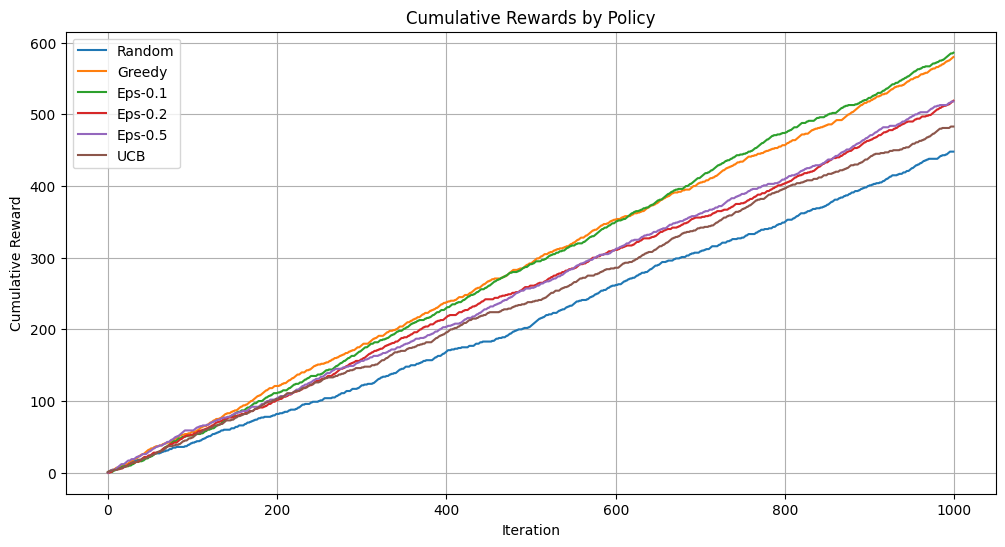

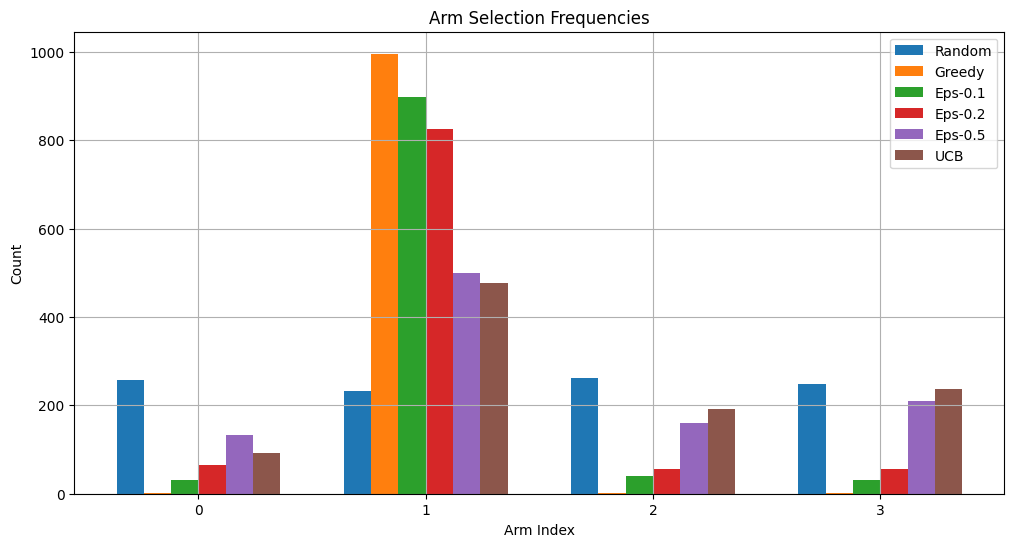

In [10]:
#-----write your code below this line---------

# Plot Cumulative Rewards
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(random_rewards), label="Random")
plt.plot(np.cumsum(greedy_rewards), label="Greedy")
plt.plot(np.cumsum(eps_01_rewards), label="Eps-0.1")
plt.plot(np.cumsum(eps_02_rewards), label="Eps-0.2")
plt.plot(np.cumsum(eps_05_rewards), label="Eps-0.5")
plt.plot(np.cumsum(ucb_rewards), label="UCB")
plt.title("Cumulative Rewards by Policy")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid()
plt.show()

# Plot Arm Frequencies
plt.figure(figsize=(12, 6))
bar_width = 0.12
x = np.arange(env.n_arms)
plt.bar(x, random_counts, bar_width, label="Random")
plt.bar(x + bar_width, greedy_counts, bar_width, label="Greedy")
plt.bar(x + 2*bar_width, eps_01_counts, bar_width, label="Eps-0.1")
plt.bar(x + 3*bar_width, eps_02_counts, bar_width, label="Eps-0.2")
plt.bar(x + 4*bar_width, eps_05_counts, bar_width, label="Eps-0.5")
plt.bar(x + 5*bar_width, ucb_counts, bar_width, label="UCB")
plt.xlabel("Arm Index")
plt.ylabel("Count")
plt.title("Arm Selection Frequencies")
plt.xticks(x + 2.5 * bar_width, [str(i) for i in env.arms])
plt.legend()
plt.grid()
plt.show()

# Conclusion (0.5M)

write a conclusion (approximately 250 words) summarizing which treatment policy was most effective. Discuss the balance between exploration and exploitation in your simulations.

`----write below this line------`

As it can be seen that for 1000 iteration we are getting Gready is outperforming all other polices, although random is lowest which is expected !


Now let try to increase iteration to 5000 to see if UCB outperform others !

In [11]:
# -------------------------------------------
# Run and Plot All Policies with 5000 iteration
# -------------------------------------------
random_rewards, random_counts = random_policy(env, 5000)
greedy_rewards, greedy_counts = greedy_policy(env, 5000)
eps_01_rewards, eps_01_counts = epsilon_greedy_policy(env, 0.1, 5000)
eps_02_rewards, eps_02_counts = epsilon_greedy_policy(env, 0.2, 5000)
eps_05_rewards, eps_05_counts = epsilon_greedy_policy(env, 0.5, 5000)
ucb_rewards, ucb_counts = ucb_policy(env, 5000)



Streaming output truncated to the last 5000 lines.
[UCB] Iter 1: Arm=0, Reward=0, UCB=[inf, inf, inf, inf]
[UCB] Iter 2: Arm=1, Reward=0, UCB=[np.float64(1.1774100225154747), inf, inf, inf]
[UCB] Iter 3: Arm=2, Reward=1, UCB=[np.float64(1.4823038073675112), np.float64(1.4823038073675112), inf, inf]
[UCB] Iter 4: Arm=3, Reward=1, UCB=[np.float64(1.6651092223153954), np.float64(1.6651092223153954), np.float64(2.6651092223153956), inf]
[UCB] Iter 5: Arm=2, Reward=0, UCB=[np.float64(1.7941225779941015), np.float64(1.7941225779941015), np.float64(2.7941225779941012), np.float64(2.7941225779941012)]
[UCB] Iter 6: Arm=3, Reward=0, UCB=[np.float64(1.8930184728248454), np.float64(1.8930184728248454), np.float64(1.8385661990458504), np.float64(2.8930184728248456)]
[UCB] Iter 7: Arm=0, Reward=0, UCB=[np.float64(1.9727697022487511), np.float64(1.9727697022487511), np.float64(1.8949588341794583), np.float64(1.8949588341794583)]
[UCB] Iter 8: Arm=1, Reward=0, UCB=[np.float64(1.442026886600883), np.f

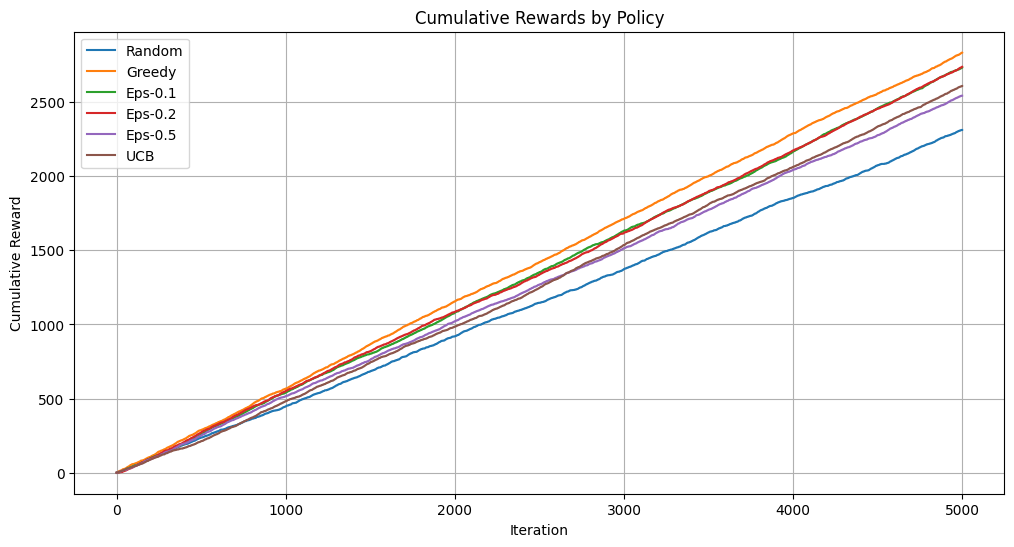

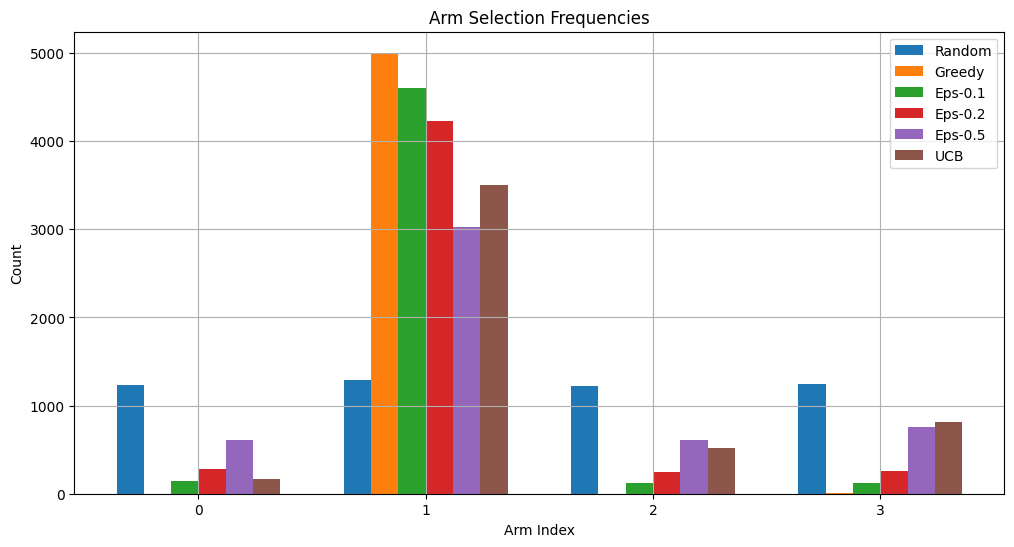

In [12]:
 # Plot Cumulative Rewards
plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(random_rewards), label="Random")
plt.plot(np.cumsum(greedy_rewards), label="Greedy")
plt.plot(np.cumsum(eps_01_rewards), label="Eps-0.1")
plt.plot(np.cumsum(eps_02_rewards), label="Eps-0.2")
plt.plot(np.cumsum(eps_05_rewards), label="Eps-0.5")
plt.plot(np.cumsum(ucb_rewards), label="UCB")
plt.title("Cumulative Rewards by Policy")
plt.xlabel("Iteration")
plt.ylabel("Cumulative Reward")
plt.legend()
plt.grid()
plt.show()

# Plot Arm Frequencies
plt.figure(figsize=(12, 6))
bar_width = 0.12
x = np.arange(env.n_arms)
plt.bar(x, random_counts, bar_width, label="Random")
plt.bar(x + bar_width, greedy_counts, bar_width, label="Greedy")
plt.bar(x + 2*bar_width, eps_01_counts, bar_width, label="Eps-0.1")
plt.bar(x + 3*bar_width, eps_02_counts, bar_width, label="Eps-0.2")
plt.bar(x + 4*bar_width, eps_05_counts, bar_width, label="Eps-0.5")
plt.bar(x + 5*bar_width, ucb_counts, bar_width, label="UCB")
plt.xlabel("Arm Index")
plt.ylabel("Count")
plt.title("Arm Selection Frequencies")
plt.xticks(x + 2.5 * bar_width, [str(i) for i in env.arms])
plt.legend()
plt.grid()
plt.show()

Now it can seen that ε-Greedy (ε=0.1) outperforms UCB on this dataset.Which might happen as exploitation is being favored in ε-Greedy and UCB maybe trying to explore and wastion time!